# **ML Group 162: Thyroid Dataset Exploration**

# Preliminaries

In [2]:
! pip install pandas
! pip install matplotlib.pyplot
! pip install numpy
! pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "thyroidDF.csv"
df = pd.read_csv(file_path)


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kaiso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kaiso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kaiso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kaiso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Display basic dataset info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Display only features with missing values

sex     307
TSH     842
T3     2604
TT4     442
T4U     809
FTI     802
TBG    8823
dtype: int64

In [5]:
# Check data types
df.dtypes

# Get unique values for categorical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    print(f"{col}: {df[col].unique()[:10]}")  # Show first 10 unique values

sex: ['F' 'M' nan]
on_thyroxine: ['f' 't']
query_on_thyroxine: ['f' 't']
on_antithyroid_meds: ['f' 't']
sick: ['f' 't']
pregnant: ['f' 't']
thyroid_surgery: ['f' 't']
I131_treatment: ['f' 't']
query_hypothyroid: ['t' 'f']
query_hyperthyroid: ['f' 't']
lithium: ['f' 't']
goitre: ['f' 't']
tumor: ['f' 't']
hypopituitary: ['f' 't']
psych: ['f' 't']
TSH_measured: ['t' 'f']
T3_measured: ['f' 't']
TT4_measured: ['f' 't']
T4U_measured: ['f' 't']
FTI_measured: ['f' 't']
TBG_measured: ['f' 't']
referral_source: ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']
target: ['-' 'S' 'F' 'AK' 'R' 'I' 'M' 'N' 'G' 'K']


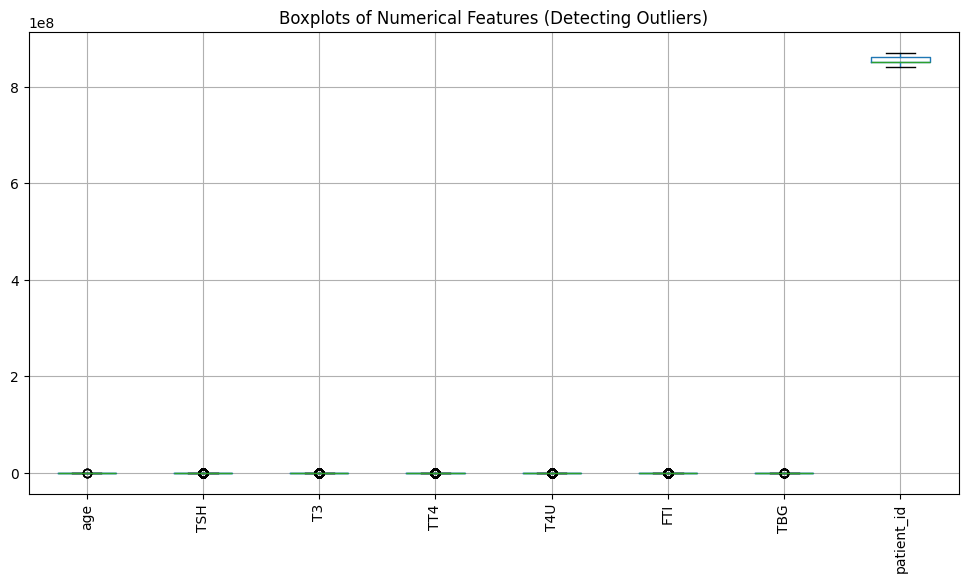

In [6]:
# Detect outliers using boxplots
numerical_features = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 6))
df[numerical_features].boxplot(rot=90)  # Rotate labels for readability
plt.title("Boxplots of Numerical Features (Detecting Outliers)")
plt.show()

In [8]:
# Summarize dataset characteristics
summary = {
    "Number of records": df.shape[0],
    "Number of features": df.shape[1],
    "Missing values summary": missing_values[missing_values > 0],
    "Categorical features": list(categorical_features),
    "Numerical features": list(numerical_features)
}

summary

{'Number of records': 9172,
 'Number of features': 31,
 'Missing values summary': sex     307
 TSH     842
 T3     2604
 TT4     442
 T4U     809
 FTI     802
 TBG    8823
 dtype: int64,
 'Categorical features': ['sex',
  'on_thyroxine',
  'query_on_thyroxine',
  'on_antithyroid_meds',
  'sick',
  'pregnant',
  'thyroid_surgery',
  'I131_treatment',
  'query_hypothyroid',
  'query_hyperthyroid',
  'lithium',
  'goitre',
  'tumor',
  'hypopituitary',
  'psych',
  'TSH_measured',
  'T3_measured',
  'TT4_measured',
  'T4U_measured',
  'FTI_measured',
  'TBG_measured',
  'referral_source',
  'target'],
 'Numerical features': ['age',
  'TSH',
  'T3',
  'TT4',
  'T4U',
  'FTI',
  'TBG',
  'patient_id']}